# **Student Training Program on AIML**
#Regression Lab 2: Loss Functions


## Motivation

The main goal of machine learning tasks is to "learn" something about data we feed to our models. But how does the model actually learn anything? To understand this, we need to first understand what objective functions are.

Mathematically, objective functions are a function whose values we desire to minimize/maximize. In the context of machine learning, the objective is commonly referred to as a **loss function**. Loss functions indicate how well the model is doing on the dataset.

The value of the objective function is simply called **loss**. Our goal is to eventually find the best model parameters that has the least average loss on the data after training.


We are familiar with the idea of **error** from the linear regression lab. RMSE is a common loss function used in machine learning. However, there are many other loss functions employed, depending on what the task is (classification, regression etc.). In this lab, we will take a look at some common loss functions, and understand why they are used where they are.


In [17]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# interactive visualization

# 1. Regression


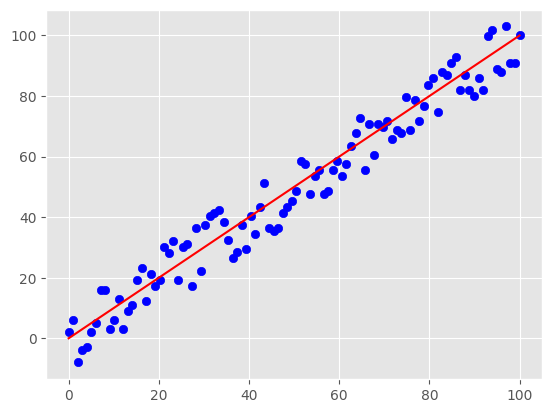

In [18]:
# initializing random data

np.random.seed(0)
x = np.linspace(0,100,100)
y_actual = np.copy(x)
y_pred = x + np.random.randint(-10,10,100)

plt.plot(x,y_actual,color="red")
plt.scatter(x,y_pred,color="blue")
plt.show()

### Mean Squared Error

As we have seen before, the formula for MSE is

$MSE = \frac{1}{m} \sum_{i=1}^n (y-y_p)^2$

The image below depicts a visualization of what the squared error is.

<img src="https://drive.google.com/uc?export=view&id=12jmqRrrqknIWKhwRpgRIJAErBjkEcyx9" width="350" height="350" align="middle"/>

MSE is also referred to as L2 loss.

Typically, we would want the units of error to be the same as the data, so we use Root Mean Squared Error instead.



In [19]:
mse = np.mean((y_actual-y_pred)**2)
print("MSE is: {}".format(mse))
print("RMSE is: {}".format(np.sqrt(mse)))

MSE is: 38.68
RMSE is: 6.219324722186485


### Mean Absolute Error

$MAE = \frac{1}{m} \sum_{i=1}^n |y-y_p|$

MAE is also commonly referred to as L1 loss.

In [20]:
mae = np.mean(np.abs(y_actual-y_pred))
print("MAE is: {}".format(mae))

MAE is: 5.5


MSE penalizes the model for making large errors by squaring the difference. However, this also means that MSE cannot handle outliers well, since they would throw the model off.

On the other hand, MAE is robust to outliers. But, MAE is non-differentiable, making it difficult to perform mathematical operations on it.

Hence, RMSE is most commonly used as a metric for evaluation.

# 2. Classification

Classification tasks involve some data, along with labels assigned to that data. For example, we may have pictures of cats and dogs, and the corresponding labels assigned to those images. We then want to train a model that can predict a label for some input image belonging to either label class (cat or dog).

## The concept of maximum likelihood

Ideally, we would want to obtain a model $\hat{\theta}$ which maximizes the probability of correctly predicting data. Mathematically, the likelihood is:

$ \prod_{i=1}^{N}  \: \hat{\theta_i}^{\theta_i}$

This is because our actual data ($\theta_i$) is either 0 or 1 depending on the label of the data, and our predicted data ($\hat{\theta_i}$) is a probability.

We usually consider the negative log of the likelihood, since log is monotonic and easier to deal with as an optimization problem.

Hence, we have

$MLE = $ arg min $\: - \sum_{i=1}^{N} \theta_i \: log \: \hat{\theta_i}$

\


## Entropy and Cross-Entropy

For some event $x$, we can obtain **information** based on its probability distribution. For example, for some event that occurs with $p=1$, we gain no information. Now, if we flip a coin and see that we obtained heads, we say that we got 1 bit of information.

Thus, the information $I$ of some event $x$ is:

$I = -log_2 \: p(x)$

We say that events with a low probability of occuring give high information, and those with a low probability give low information.

Now, if we have some random variable $X$, its **entropy** is the expected value of the information obtained.

$H(x) = - \sum_{k} p_k \: log \: p_k$

Now, suppose we are trying to correctly predict labels of some data. Let P be the true distribution of the labels, and Q be the predicted distribution of labels.

Cross-Entropy is then defined as:

$H(P,Q) = - \sum_{x} P(x)\: log \: Q(x)$

which is basically the entropy between two probability distributions over the same events.

\


## MLE and Cross-Entropy

So, in the case of classification, the equation for minimization of the cross-entropy between the actual data and the predicted data would be:

arg min $\: -\sum_{i=1}^{N} P(x) \: log \: Q(x)$

$= $ arg min $\: -\sum_{i=1}^{N} \theta_i \: log \: \hat{\theta_i}$


which is exactly the same as what we had obtained for minimizing the negative log likelihood. Hence, the two problems are equivalent.

1/1+e^(-x)

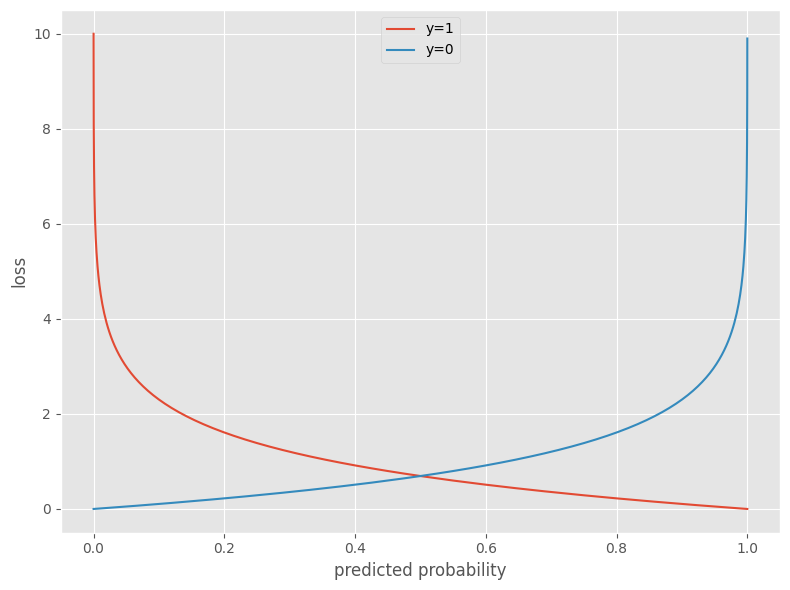

In [21]:
def sigmoid(z):
  return 1/(1 + np.exp(-z))

def cross_entropy_loss(y_,y):
  if y==1:
    return -np.log(y_)

  return -np.log(1-y_)

z = np.arange(-10, 10, 0.1)
h_z = sigmoid(z)

cost_1 = cross_entropy_loss(h_z, 1)
cost_0 = cross_entropy_loss(h_z, 0)

fig, ax = plt.subplots(figsize=(8,6))
plt.plot(h_z, cost_1, label='y=1')
plt.plot(h_z, cost_0, label='y=0')
plt.xlabel('predicted probability')
plt.ylabel('loss')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## KNN-regression

Till now, we have studied KNN as a classification algorithm, which uses feature similarity and voting to decide the class labels of unseen data.

For regression, we use the same idea: We take the y-values of the k nearest neighbours, and compute their average, which is our predicted y-value. We do this for every x whose value we want to predict.

In the visualization below, we have k=3, and the red dots are the new x-values whose output we want to predict.

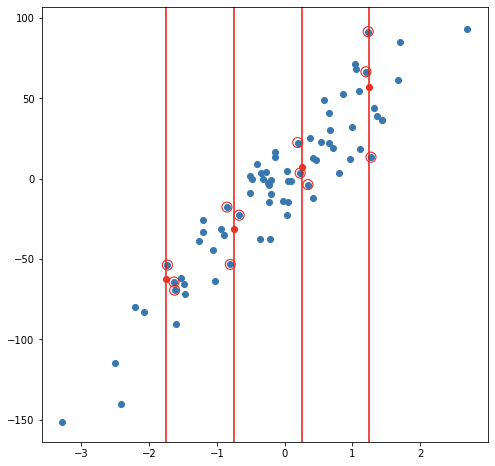

In [22]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [23]:
train_path = "https://raw.githubusercontent.com/PranavTadimeti/Regression-lab2/main/BigMart-train.csv"

train = pd.read_csv(train_path)

In [24]:
# Preprocess Data

def preprocess(df):
  mean_weight = df['Item_Weight'].mean()
  df['Item_Weight'].fillna(mean_weight,inplace=True)

  mode_size = df['Outlet_Size'].mode()
  df['Outlet_Size'].fillna(mode_size,inplace=True)

  df.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

  return pd.get_dummies(df)

train = preprocess(train)

train.head()

C:\Users\IC1807\AppData\Local\Temp\ipykernel_14808\319556835.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Item_Weight'].fillna(mean_weight,inplace=True)
C:\Users\IC1807\AppData\Local\Temp\ipykernel_14808\319556835.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,False,True,False,False,False,...,False,True,False,True,False,False,False,True,False,False
1,5.92,0.019278,48.2692,2009,443.4228,False,False,True,False,False,...,False,True,False,False,False,True,False,False,True,False
2,17.50,0.016760,141.6180,1999,2097.2700,False,True,False,False,False,...,False,True,False,True,False,False,False,True,False,False
3,19.20,0.000000,182.0950,1998,732.3800,False,False,True,False,False,...,False,False,False,False,False,True,True,False,False,False
4,8.93,0.000000,53.8614,1987,994.7052,False,True,False,False,False,...,True,False,False,False,False,True,False,True,False,False


In [25]:
train , test = train_test_split(train, test_size = 0.3)

x_train = train.drop('Item_Outlet_Sales', axis=1)
y_train = train['Item_Outlet_Sales']

x_test = test.drop('Item_Outlet_Sales', axis = 1)
y_test = test['Item_Outlet_Sales']

In [26]:
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

In [27]:
def knn_regression(k,x_train,y_train,x_test,y_test):
    model = neighbors.KNeighborsRegressor(n_neighbors = k)

    model.fit(x_train, y_train)
    pred=model.predict(x_test)
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val.append(error)

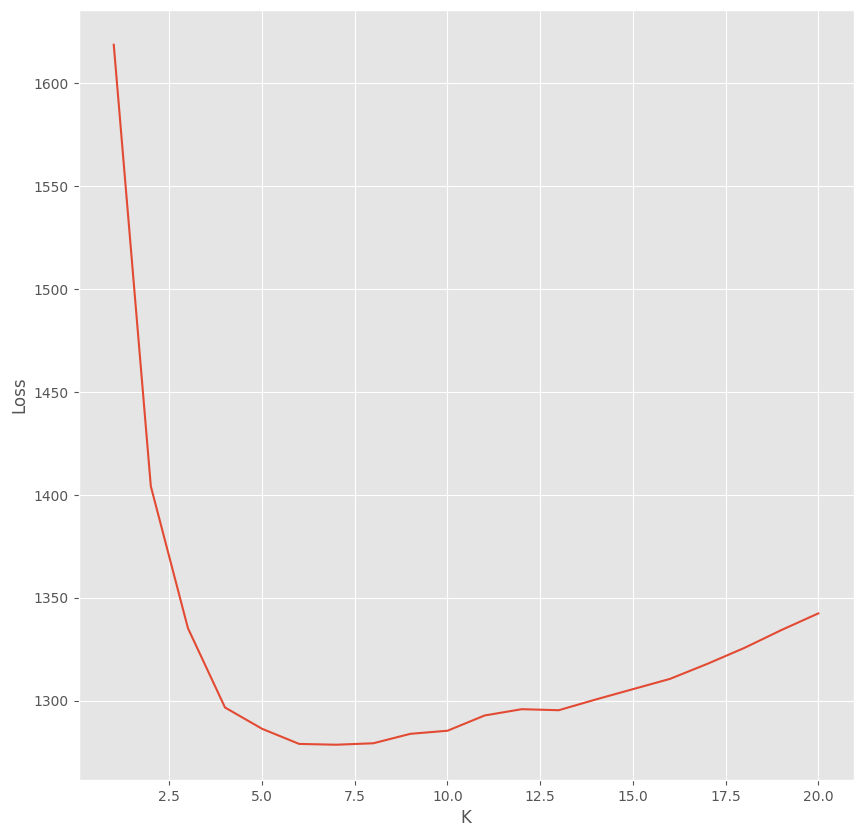

Minimum error 1278.5816281094171 is at k = 6


In [28]:
rmse_val = []

for k in range(1,21):
  knn_regression(k,x_train,y_train,x_test,y_test)

figure = plt.figure(figsize=(10,10))
plt.plot(np.arange(1,21),rmse_val)
plt.xlabel("K")
plt.ylabel("Loss")
plt.show()

rmse_val = np.asarray(rmse_val)
print("Minimum error {} is at k = {}".format(np.min(rmse_val),np.argmin(rmse_val)))

## Exercises

1. Try out these loss functions on regression tasks, and try to understand the model performance based on the loss function.
2. Explore other loss functions and try to understand when and why they are used.

Sol: Other loss functions

- Log-Cosh Loss: Similar to MSE but smoother, good for stable training
- MSLE (Mean Squared Log Error): Useful when target values span large ranges. Focuses on relative error not absolute.
- Quantile Loss: Used when predicting percentiles

3. Try out KNN-regression on other datasets see which values of K give the best results.

Sol: KNN regression on other datasets

- Small K (like 1–3): Model follows data very closely and can overfit.
- Medium K (like 5–10): Balances smoothness and accuracy.
- Large K: Too much averaging so, underfits the data.

4. Try exploring what will happen if K is set to 1 or K is set to size of whole training dataset.

Sol: K=1: Prediction = nearest neighbor’s value.
- Very low training error but very noisy.

K = size of dataset: Prediction = average of all training points
- Same for every test point so, model is useless

## Exercise Implementation

### Exercise 1: Compare Loss Functions on Regression Tasks

Loss Function Comparison on Regression Task:
MSE: 443.6244
MAE: 17.0702
RMSE: 21.0624
Huber Loss: 16.5766
Log-Cosh Loss: 16.3901


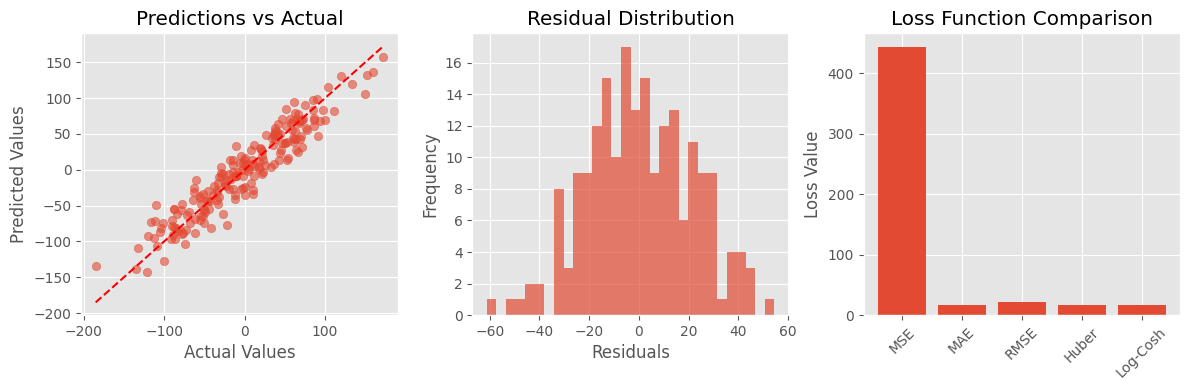

In [30]:
# Create synthetic regression dataset
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# Generate regression dataset
X_reg, y_reg = make_regression(n_samples=1000, n_features=5, noise=20, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_reg)
X_test_scaled = scaler.transform(X_test_reg)

# Train linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train_reg)
y_pred_reg = lr_model.predict(X_test_scaled)

# Calculate different loss functions
mse_reg = mean_squared_error(y_test_reg, y_pred_reg)
mae_reg = mean_absolute_error(y_test_reg, y_pred_reg)
rmse_reg = np.sqrt(mse_reg)

# Custom loss functions
def huber_loss(y_true, y_pred, delta=1.0):
    residual = np.abs(y_true - y_pred)
    return np.where(residual <= delta, 
                    0.5 * residual**2, 
                    delta * residual - 0.5 * delta**2).mean()

def log_cosh_loss(y_true, y_pred):
    return np.log(np.cosh(y_pred - y_true)).mean()

huber_reg = huber_loss(y_test_reg, y_pred_reg)
logcosh_reg = log_cosh_loss(y_test_reg, y_pred_reg)

# Compare results
print("Loss Function Comparison on Regression Task:")
print(f"MSE: {mse_reg:.4f}")
print(f"MAE: {mae_reg:.4f}")
print(f"RMSE: {rmse_reg:.4f}")
print(f"Huber Loss: {huber_reg:.4f}")
print(f"Log-Cosh Loss: {logcosh_reg:.4f}")

# Visualize predictions vs actual
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.scatter(y_test_reg, y_pred_reg, alpha=0.6)
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predictions vs Actual')

plt.subplot(1, 3, 2)
residuals = y_test_reg - y_pred_reg
plt.hist(residuals, bins=30, alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residual Distribution')

plt.subplot(1, 3, 3)
loss_names = ['MSE', 'MAE', 'RMSE', 'Huber', 'Log-Cosh']
loss_values = [mse_reg, mae_reg, rmse_reg, huber_reg, logcosh_reg]
plt.bar(loss_names, loss_values)
plt.ylabel('Loss Value')
plt.title('Loss Function Comparison')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Exercise 2: Implement Alternative Loss Functions

Alternative Loss Functions:
MSLE (on positive values): 0.5748
Quantile Loss (25th percentile): 8.4007
Quantile Loss (50th percentile): 8.5351
Quantile Loss (75th percentile): 8.6695


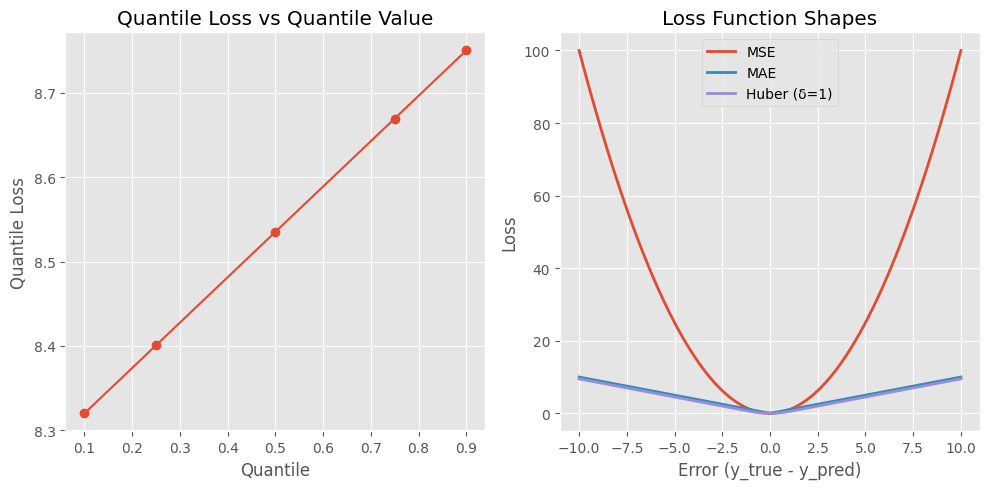

In [31]:
# Implement MSLE (Mean Squared Logarithmic Error)
def msle(y_true, y_pred):
    # Add small epsilon to avoid log(0)
    epsilon = 1e-8
    y_true_log = np.log(np.maximum(y_true + 1, epsilon))
    y_pred_log = np.log(np.maximum(y_pred + 1, epsilon))
    return np.mean((y_true_log - y_pred_log)**2)

# Implement Quantile Loss (Pinball Loss)
def quantile_loss(y_true, y_pred, quantile=0.5):
    residual = y_true - y_pred
    return np.mean(np.maximum(quantile * residual, (quantile - 1) * residual))

# Test on positive dataset (required for MSLE)
y_test_pos = np.abs(y_test_reg)
y_pred_pos = np.abs(y_pred_reg)

# Calculate alternative loss functions
msle_value = msle(y_test_pos, y_pred_pos)
quantile_50 = quantile_loss(y_test_reg, y_pred_reg, quantile=0.5)  # Median (equivalent to MAE)
quantile_25 = quantile_loss(y_test_reg, y_pred_reg, quantile=0.25)
quantile_75 = quantile_loss(y_test_reg, y_pred_reg, quantile=0.75)

print("Alternative Loss Functions:")
print(f"MSLE (on positive values): {msle_value:.4f}")
print(f"Quantile Loss (25th percentile): {quantile_25:.4f}")
print(f"Quantile Loss (50th percentile): {quantile_50:.4f}")
print(f"Quantile Loss (75th percentile): {quantile_75:.4f}")

# Compare with different quantiles
quantiles = [0.1, 0.25, 0.5, 0.75, 0.9]
quantile_losses = [quantile_loss(y_test_reg, y_pred_reg, q) for q in quantiles]

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(quantiles, quantile_losses, 'o-')
plt.xlabel('Quantile')
plt.ylabel('Quantile Loss')
plt.title('Quantile Loss vs Quantile Value')
plt.grid(True)

plt.subplot(1, 2, 2)
# Show how different loss functions penalize errors differently
errors = np.linspace(-10, 10, 100)
mse_errors = errors**2
mae_errors = np.abs(errors)
huber_errors = np.where(np.abs(errors) <= 1, 0.5 * errors**2, np.abs(errors) - 0.5)

plt.plot(errors, mse_errors, label='MSE', linewidth=2)
plt.plot(errors, mae_errors, label='MAE', linewidth=2)
plt.plot(errors, huber_errors, label='Huber (δ=1)', linewidth=2)
plt.xlabel('Error (y_true - y_pred)')
plt.ylabel('Loss')
plt.title('Loss Function Shapes')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

### Exercise 3: KNN Regression on Multiple Datasets

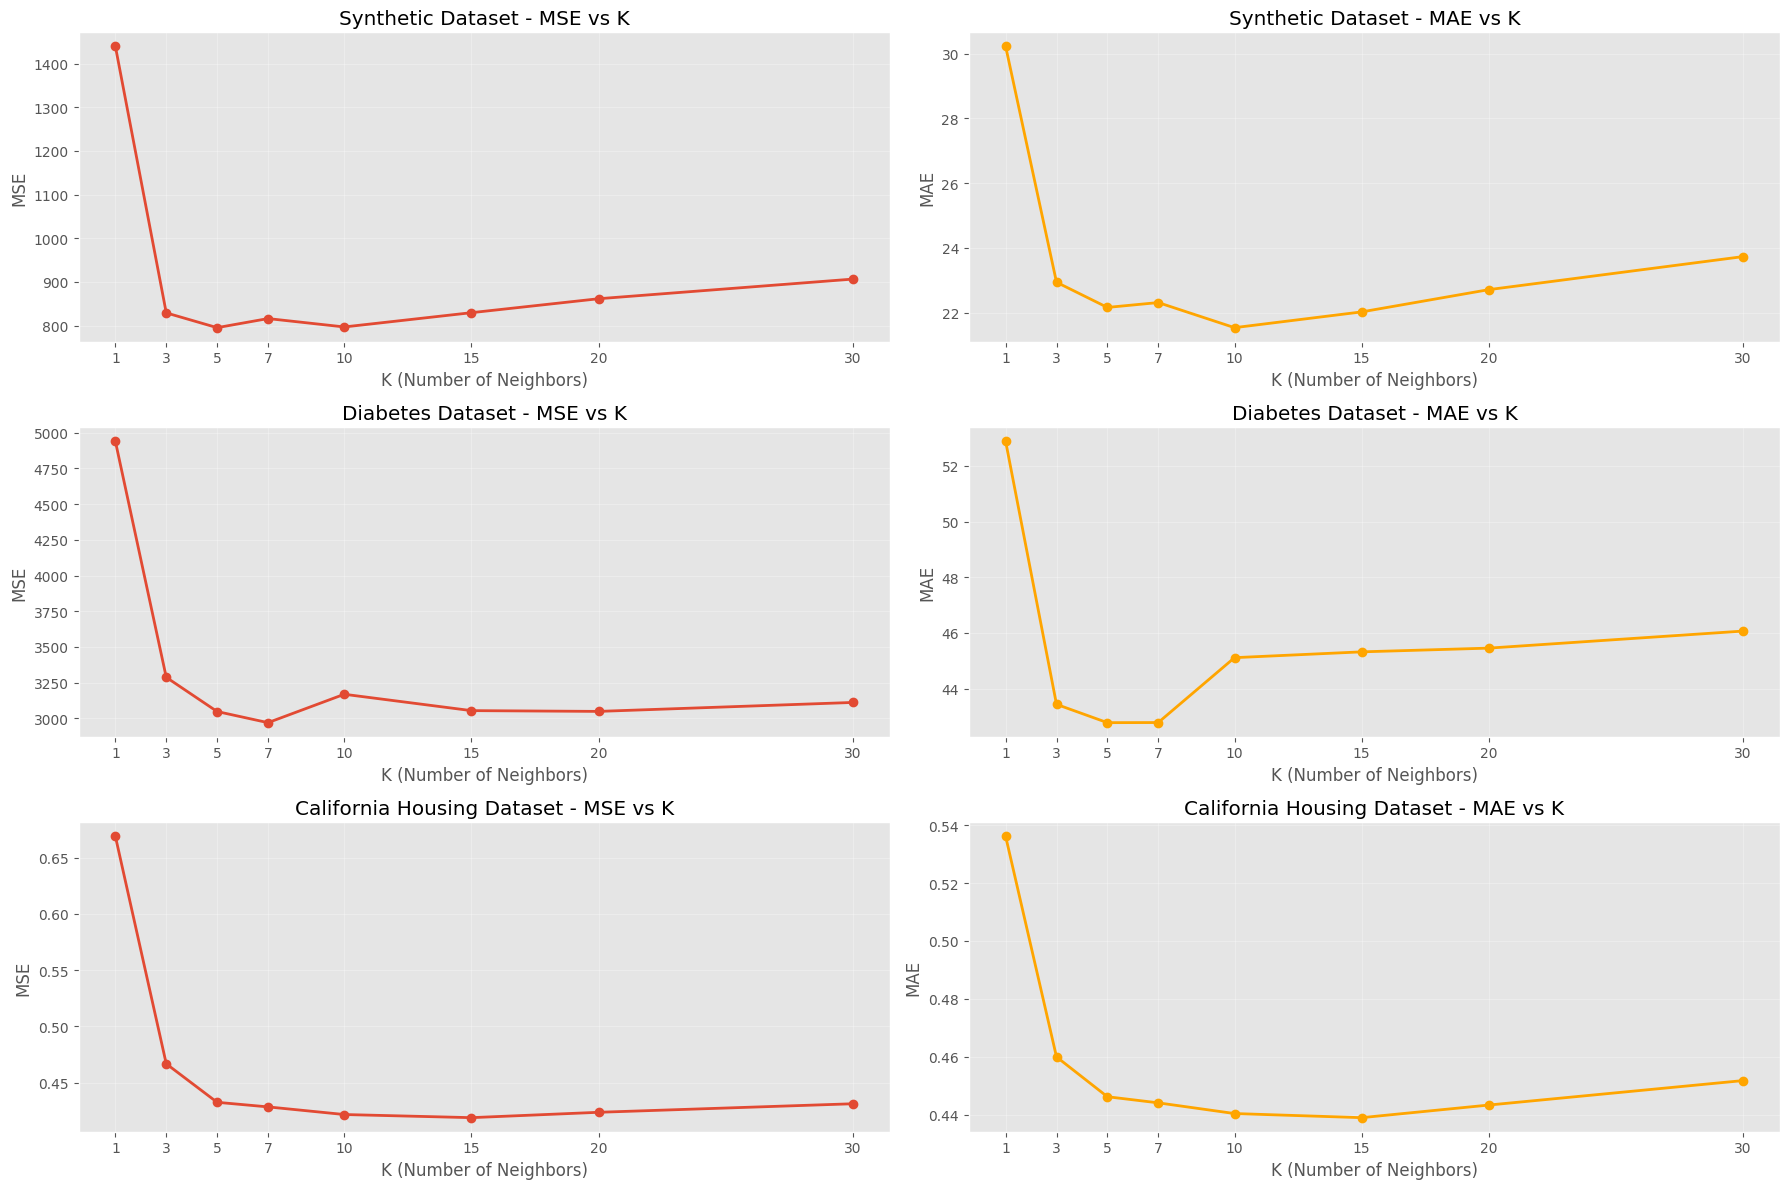

Optimal K values:
Synthetic:
  Optimal K (MSE): 5 (MSE: 795.4245)
  Optimal K (MAE): 10 (MAE: 21.5345)
Diabetes:
  Optimal K (MSE): 7 (MSE: 2969.5237)
  Optimal K (MAE): 5 (MAE: 42.7775)
California Housing:
  Optimal K (MSE): 15 (MSE: 0.4188)
  Optimal K (MAE): 15 (MAE: 0.4389)


In [33]:
# Test KNN on multiple datasets with different K values
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import load_diabetes
import warnings
warnings.filterwarnings('ignore')

# Load different datasets
datasets = []

# Dataset 1: Synthetic regression data (already created)
datasets.append(("Synthetic", X_train_scaled, X_test_scaled, y_train_reg, y_test_reg))

# Dataset 2: Diabetes dataset
diabetes = load_diabetes()
X_diab_train, X_diab_test, y_diab_train, y_diab_test = train_test_split(
    diabetes.data, diabetes.target, test_size=0.2, random_state=42)
scaler_diab = StandardScaler()
X_diab_train_scaled = scaler_diab.fit_transform(X_diab_train)
X_diab_test_scaled = scaler_diab.transform(X_diab_test)
datasets.append(("Diabetes", X_diab_train_scaled, X_diab_test_scaled, y_diab_train, y_diab_test))

# Dataset 3: California housing dataset
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()
X_cal_train, X_cal_test, y_cal_train, y_cal_test = train_test_split(
    california.data, california.target, test_size=0.2, random_state=42)
scaler_cal = StandardScaler()
X_cal_train_scaled = scaler_cal.fit_transform(X_cal_train)
X_cal_test_scaled = scaler_cal.transform(X_cal_test)
datasets.append(("California Housing", X_cal_train_scaled, X_cal_test_scaled, y_cal_train, y_cal_test))

# Test different K values
k_values = [1, 3, 5, 7, 10, 15, 20, 30]
results = {}

for dataset_name, X_train, X_test, y_train, y_test in datasets:
    results[dataset_name] = {'k_values': k_values, 'mse': [], 'mae': []}
    
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        
        results[dataset_name]['mse'].append(mse)
        results[dataset_name]['mae'].append(mae)

# Plot results
plt.figure(figsize=(18, 12))

for i, dataset_name in enumerate(results.keys()):
    # MSE plot
    plt.subplot(3, 2, i*2 + 1)
    plt.plot(k_values, results[dataset_name]['mse'], 'o-', linewidth=2, markersize=6)
    plt.xlabel('K (Number of Neighbors)')
    plt.ylabel('MSE')
    plt.title(f'{dataset_name} Dataset - MSE vs K')
    plt.grid(True, alpha=0.3)
    plt.xticks(k_values)
    
    # MAE plot
    plt.subplot(3, 2, i*2 + 2)
    plt.plot(k_values, results[dataset_name]['mae'], 'o-', color='orange', linewidth=2, markersize=6)
    plt.xlabel('K (Number of Neighbors)')
    plt.ylabel('MAE')
    plt.title(f'{dataset_name} Dataset - MAE vs K')
    plt.grid(True, alpha=0.3)
    plt.xticks(k_values)

plt.tight_layout()
plt.show()

# Find optimal K for each dataset
print("Optimal K values:")
for dataset_name in results.keys():
    mse_values = results[dataset_name]['mse']
    mae_values = results[dataset_name]['mae']
    
    optimal_k_mse = k_values[np.argmin(mse_values)]
    optimal_k_mae = k_values[np.argmin(mae_values)]
    
    print(f"{dataset_name}:")
    print(f"  Optimal K (MSE): {optimal_k_mse} (MSE: {min(mse_values):.4f})")
    print(f"  Optimal K (MAE): {optimal_k_mae} (MAE: {min(mae_values):.4f})")

### Exercise 4: K=1 vs K=dataset_size Comparison

Extreme K Comparison on Synthetic Dataset:
Training set size: 800

K=1 (Nearest Neighbor):
  MSE: 1439.1463
  MAE: 30.2194

K=800 (Global Average):
  MSE: 4193.3743
  MAE: 53.0518

Global average of training labels: -0.2215
K=800 predictions (should be constant): [-0.22146089 -0.22146089 -0.22146089 -0.22146089 -0.22146089] ...


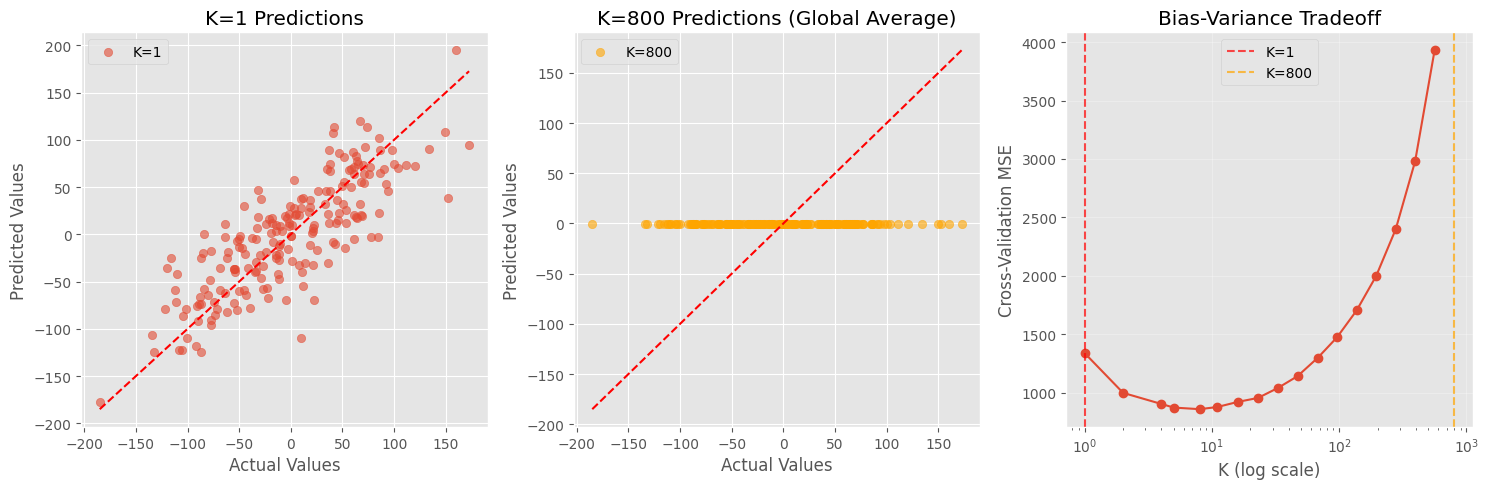


Analysis:
- K=1 gives high variance (overfitting): MSE = 1439.1463
- K=800 gives high bias (underfitting): MSE = 4193.3743
- Optimal K balances bias and variance
- K=800 always predicts the global mean: -0.2215


In [34]:
# Compare extreme cases: K=1 (nearest neighbor) vs K=dataset_size (global average)
from sklearn.model_selection import cross_val_score

# Test on the train dataset from earlier (using the synthetic dataset)
print("Extreme K Comparison on Synthetic Dataset:")
print(f"Training set size: {len(X_train_scaled)}")

# K=1: Nearest neighbor
knn_1 = KNeighborsRegressor(n_neighbors=1)
knn_1.fit(X_train_scaled, y_train_reg)
y_pred_k1 = knn_1.predict(X_test_scaled)

# K=dataset_size: Global average (all neighbors)
k_max = len(X_train_scaled)
knn_max = KNeighborsRegressor(n_neighbors=k_max)
knn_max.fit(X_train_scaled, y_train_reg)
y_pred_kmax = knn_max.predict(X_test_scaled)

# Calculate metrics for both
mse_k1 = mean_squared_error(y_test_reg, y_pred_k1)
mae_k1 = mean_absolute_error(y_test_reg, y_pred_k1)

mse_kmax = mean_squared_error(y_test_reg, y_pred_kmax)
mae_kmax = mean_absolute_error(y_test_reg, y_pred_kmax)

print(f"\nK=1 (Nearest Neighbor):")
print(f"  MSE: {mse_k1:.4f}")
print(f"  MAE: {mae_k1:.4f}")

print(f"\nK={k_max} (Global Average):")
print(f"  MSE: {mse_kmax:.4f}")
print(f"  MAE: {mae_kmax:.4f}")

# Verify that K=dataset_size gives global average
global_avg = np.mean(y_train_reg)
print(f"\nGlobal average of training labels: {global_avg:.4f}")
print(f"K={k_max} predictions (should be constant): {y_pred_kmax[:5]} ...")

# Visualize the difference
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(y_test_reg, y_pred_k1, alpha=0.6, label='K=1')
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('K=1 Predictions')
plt.legend()

plt.subplot(1, 3, 2)
plt.scatter(y_test_reg, y_pred_kmax, alpha=0.6, label=f'K={k_max}', color='orange')
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'K={k_max} Predictions (Global Average)')
plt.legend()

plt.subplot(1, 3, 3)
# Show bias-variance tradeoff concept
k_range = np.logspace(0, np.log10(k_max), 20).astype(int)
k_range = np.unique(k_range)  # Remove duplicates
k_range = k_range[k_range <= k_max]

mse_values = []
for k in k_range:
    knn_temp = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn_temp, X_train_scaled, y_train_reg, 
                           cv=5, scoring='neg_mean_squared_error')
    mse_values.append(-scores.mean())

plt.semilogx(k_range, mse_values, 'o-')
plt.axvline(x=1, color='red', linestyle='--', alpha=0.7, label='K=1')
plt.axvline(x=k_max, color='orange', linestyle='--', alpha=0.7, label=f'K={k_max}')
plt.xlabel('K (log scale)')
plt.ylabel('Cross-Validation MSE')
plt.title('Bias-Variance Tradeoff')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Analysis
print(f"\nAnalysis:")
print(f"- K=1 gives high variance (overfitting): MSE = {mse_k1:.4f}")
print(f"- K={k_max} gives high bias (underfitting): MSE = {mse_kmax:.4f}")
print(f"- Optimal K balances bias and variance")
print(f"- K={k_max} always predicts the global mean: {global_avg:.4f}")

## References ##
1. https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html
2. https://www.geeksforgeeks.org/k-nearest-neighbours/
3. https://bookdown.org/tpinto_home/Regression-and-Classification/k-nearest-neighbours-regression.html#:~:text=KNN%20regression%20is%20a%20non,observations%20in%20the%20same%20neighbourhood